In [ ]:
# Copyright 2021 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
#
# Author: Dheeraj Bharti, Chiranjeev Prachand and Prof T. Sandhan, Department of Electrical Engineering, IIT Kanpur

Q1. Colour processing

In this question, first we will change image from RGB colour space to Gray and HSV colour space. then in the second part we have to write a program which will delete a particular colour from a coloured image and the reverse problem, in which it will delete all colours but one from a coloured image.

Some references:

1) https://docs.opencv.org/4.5.1/df/d9d/tutorial_py_colorspaces.html

2) https://docs.opencv.org/4.5.1/de/d25/imgproc_color_conversions.html

3) https://en.wikipedia.org/wiki/HSL_and_HSV#Color_conversion_formulae

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# If by mistake image files are not available in folder the programs below do not say "file is not available".
# Rather it blames some of the operation in the function below. I DID THIS MISTAKE AND WASTED MY TIME IN DEBUGGING (unnecessarily).
# Hence in this cell i am just checking if image files are available or not. I am importing "os" library just for checking.
# This cell has no relation to any of the algorithm assigned to us. We can surely remove this cell and the notebook will run normally.
import os
print("Notation: True -> Available, False -> Not Available")
print("Is Image 1 available (True/False) ", os.path.exists('./im1_1.jpg'))
print("Is Image 2 available (True/False) ", os.path.exists('./im1_2.jpg'))
print("Is Image 3 available (True/False) ", os.path.exists('./im1_3.jpg'))
print("Is Image 4 available (True/False) ", os.path.exists('./im1_4.jpg'))

Notation: True -> Available, False -> Not Available
Is Image 1 available (True/False)  True
Is Image 2 available (True/False)  True
Is Image 3 available (True/False)  True
Is Image 4 available (True/False)  True


# Customized Function

In [27]:
def rgb2hsv_pix(rgb_color):
    ''' 
    This function converts rgb (in order) value of one pixel to hsi value

    Input:
    - rgb_color - list having 3 values r, g, b (in order)

    Output: 
    - h,s,v - returns individual values of h,s,v.

    Used modules:
    - Numpy only

    '''
    rgb_sum = np.sum(np.array(rgb_color))
    r = rgb_color[0] / 255
    g = rgb_color[1] / 255
    b = rgb_color[2] / 255

    c_theta = 0.5*((r-g)+(r-b)) / (((r-g)**2 + (r-b)*(g-b))**0.5)
    theta = np.arccos(c_theta) * 180 / np.pi 
    if b>g:
        theta = 360 - theta
    h = theta

    v = (1/3) * (r+g+b)
    s = (1 - (3/(r+g+b))*min(r,g,b))
    #   Den_H = (2*r - g - b)
    #   Num_H = np.sqrt(3)*(g - b)
    #   h = np.arctan2(Num_H , Den_H) * (180 / np.pi)
    
    return h,s,v

def hsv2rgb_pix(hsv_color):
    ''' 
    This function converts hsv (in order) value of one pixel to rgb value

    Input:
    - rgb_color - list having 3 values h, s, v (in order)

    Output: 
    - red,green,blue - returns individual values of red,green,blue in order

    Used modules:
    - Numpy only

    '''

    h = hsv_color[0] 
    s = hsv_color[1] 
    v = hsv_color[2] 

    if h>=0 and h<120:
        rad60mh = (60-h) *(np.pi / 180)
        h = h*(np.pi / 180 )
        blue = v*(1-s)
        red = v*(1+(s*np.cos(h) / np.cos(rad60mh)))
        green = 3 - (red+blue)

    elif h>=120 and h<240:
        h = h-120
        rad60mh = (60-h) *(np.pi / 180)
        h = h*(np.pi / 180 )
        red = v*(1-s)
        green = v*(1+(s*np.cos(h) / np.cos(rad60mh)))
        blue = 3 - (red+green)

    else:
        h = h-240
        rad60mh = (60-h) * (np.pi / 180)
        h = h*(np.pi / 180 )
        green = v*(1-s)
        blue = v*(1+(s*np.cos(h) / np.cos(rad60mh)))
        red = 3 - (green+blue)
        
    sum_rgb = red+green+blue
    red = int((red*255*3) / sum_rgb)
    green = int((green*255*3) / sum_rgb)
    blue = int((blue*255*3) / sum_rgb)
    
    if red > 255:
        red = 255
    if green > 255:
        green = 255
    if blue > 255:
        blue = 255
    
    return red,green,blue

def hsv2rgb(hsv_img):
    ''' 
    This function converts hsv image array  to rgb image array

    Input:
    - hsv_img - np array of dim = (n_rows, n_cols, 3) - hsv image array

    Output: 
    - out_img - returns np array of dim = (n_rows, n_cols, 3) - rgb image array

    Used modules:
    - Numpy only

    '''

    n_rows = hsv_img.shape[0]
    n_cols = hsv_img.shape[1]
    out_img = np.zeros((n_rows, n_cols,3))
    for i in range(n_rows):
        for j in range(n_cols):
            hsv_color = [hsv_img[i,j,0], hsv_img[i,j,1], hsv_img[i,j,2]]
            out_img[i,j,0], out_img[i,j,1], out_img[i,j,2] = hsv2rgb_pix(hsv_color)
    return out_img

def bgr2gray_pix(pix):
    ''' 
    This function converts bgr (in order) value of one pixel to gray value

    Input:
    - pix - list having 3 values b, g, r (in order)

    Output: 
    - gray_pix - returns int - gray level value

    Used modules:
    - Numpy only

    '''
    img = img/255
    gray_pix = pix[0] + pix[1] + pix[2]
    gray_pix = (gray_pix / np.sqrt(3)) *255
    gray_pix = int(gray_pix)
    return gray_pix

def bgr2hsv_pix(img_pix_list):
    '''
    This function converts bgr (in order) value of one pixel to hsi value
    Although there is a similar function before "bgr2hsv_pix" defined before,
    Here the approach is slightly different but the result is same (also takes inp in diff order i.e. bgr - not rgb)

    Input:
    - img_pix_list - list having 3 values b, g, r (in order)

    Output: 
    - out_pix- list having 3 values of h,s,v.

    Used modules:
    - Numpy only

    '''
    inp_pix = np.array(img_pix_list)
    out_pix = inp_pix
    delta = 0.01 #  Just to avoid Saturation value to get divided by 0
    inp_pix = (inp_pix+delta)/(255+delta)
    rgb_pix = inp_pix
    
    rgb_img[0] = inp_pix[2]
    rgb_img[1] = inp_pix[1]
    rgb_img[2] = inp_pix[0]
    
    I = ((1/3) * (rgb_img[0] + rgb_img[1] + rgb_img[2]))
    S = (1 - np.divide(np.minimum(rgb_img[2], np.minimum(rgb_img[0], rgb_img[1])), I))
    Den_H = (2*rgb_img[0] - rgb_img[1] - rgb_img[2])
    Num_H = np.sqrt(3)*(rgb_img[1] - rgb_img[2])
    H = np.arctan2(Num_H , Den_H) * (180 / np.pi)  
    out_pix[0] = H
    out_pix[1] = S
    out_pix[2] = I
    return out_pix

In [28]:
def bgr2gray(img):
    ''' 
    Write a program which takes an 3 channel uint8 np array of color image and 
    convertes it to a single channel uint8 np array of gray image.

    Input:
    - img - 3 Channel uint8 np array in order bgr

    Output: 
    - gray_img - single channel uint8 np array gray image.

    Allowed modules:
    - Numpy, Math(if needed)
    - you are not allowed to use any cv functions or direct implementations.

    '''
    img = img/255
    gray_img = img[:,:,0] + img[:,:,1] + img[:,:,2]
    gray_img = (gray_img / np.sqrt(3)) *255
    gray_img = gray_img.astype(int)
    return gray_img

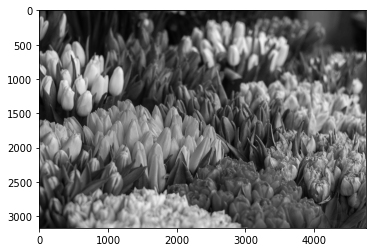

In [29]:
# Testing function bgr2gray
im1 = cv2.imread("im1_1.jpg")
im1_gray = bgr2gray(im1)
plt.imshow(im1_gray, cmap='gray')

In [30]:
def bgr2hsv(img):
    ''' 
    Write a program which takes an 3 channel uint8 np array of image in BGR space 
    and convertes it to a 3 channel uint8 np array of image in HSV space.

    Input:
    - img - 3 Channel uint8 np array in order bgr

    Output: 
    - out_img - 3 channel uint8 np array image in HSV order.

    Allowed modules:
    - Numpy, Math(if needed)
    - you are not allowed to use any cv functions or direct implementations.

    '''
    n_rows = img.shape[0]
    n_cols = img.shape[1]
    out_img = np.zeros((n_rows, n_cols, 3))
    delta = 0.01 #  Just to avoid Saturation value to get divided by 0
    img = (img+delta)/(255+delta)
    rgb_img = np.zeros((n_rows, n_cols, 3))
    rgb_img[:,:,0] = img[:,:,2]
    rgb_img[:,:,1] = img[:,:,1]
    rgb_img[:,:,2] = img[:,:,0]
    I = ((1/3) * (rgb_img[:,:,0] + rgb_img[:,:,1] + rgb_img[:,:,2]))
    S = (1 - np.divide(np.minimum(rgb_img[:,:,2], np.minimum(rgb_img[:,:,0], rgb_img[:,:,1])), I))
    Den_H = (2*rgb_img[:,:,0] - rgb_img[:,:,1] - rgb_img[:,:,2])
    Num_H = np.sqrt(3)*(rgb_img[:,:,1] - rgb_img[:,:,2])
    H = np.arctan2(Num_H , Den_H) * (180 / np.pi)  
    out_img[:,:,0] = H
    out_img[:,:,1] = S
    out_img[:,:,2] = I
    return out_img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


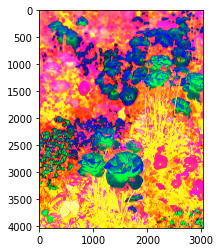

In [31]:
# Testing function bgr2hsv
im2 = cv2.imread("im1_2.jpg")
im2_hsv = bgr2hsv(im2)
plt.imshow(im2_hsv, cmap='hsv')

In [32]:
def filter_color(img, color):
    '''
    Write a program takes a coloured image and returns a colored image filtering a
    specific colour from it. The ouput image will not cosists of that one colour,
    but other colours are not affected. 
    For example, if the image is of rainbow and we choose to filter orange colour 
    then the output image will consists of all colours except orange, the pixels 
    containing the orange colors are converted to gray.

    Inputs:
    - img     - 3 channel uint8 np array containg an image in bgr format
    - color   - the 3x1 array containg the bgr values of colour which is to be
              filtered from image

    Output:
    - out_img - 3 channel uint8 np array containg colour filtered image in RGB format

    Allowed modules:
    - Numpy, cv, math(if required).
    - You are not allowed to use any direct implimentations.

    Hint:
    - Use HSV colour space to find the pixels containing that colour

    '''
    hsv_img = bgr2hsv(img)
    rgb_color = color
    rgb_color[0] = color[2]
    rgb_color[1] = color[1]
    rgb_color[2] = color[0]
    
    h,s,v = rgb2hsv_pix(rgb_color)
    # h_new,s_new,v_new = rgb2hsv_pix(rgb_color)
    # print(h,s,v)
    # print(h_new,s_new,v_new)

    n_rows = img.shape[0]
    n_cols = img.shape[1]
    threshold = 10
    out_img = np.zeros((n_rows,n_cols,3))
    out_img[:,:,0] = img[:,:,2]
    out_img[:,:,1] = img[:,:,1]
    out_img[:,:,2] = img[:,:,0]

    for i in range(n_rows):
        for j in range(n_cols):
            if np.abs(h - hsv_img[i,j,0]) <= threshold:
                temp = (img[i,j,0] + img[i,j,1] + img[i,j,2])/255
                temp = (temp_img / np.sqrt(3)) *255
                out_img[i,j,0] = temp
                out_img[i,j,1] = temp
                out_img[i,j,2] = temp
    out_img = out_img.astype(int)
    return out_img


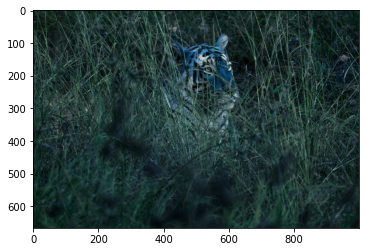

In [33]:
im3 = cv2.imread("im1_3.jpg")
im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)
im3_filtered = filter_color(im3, [0, 165, 255])
plt.imshow(im3_filtered)

In [47]:
def color_pop(img, color):
    
    '''
    Write a program which pops a particular colour in a coloured image. This problem 
    is inverse to the previous one. Here all the colours are converted to gray 
    except the color given.

    Inputs:
    - img     - 3 channel uint8 np array containg an image in bgr format
    - color   - the 3x1 array containg the bgr values of colour which is to be
              popped in image

    Output:
    - out_img - 3 channel uint8 np array containg colour popped image in RGB format

    Allowed modules:
    - Numpy, cv, math(if required).
    - You are not allowed to use any direct implimentations.

    Hint:
    - Use HSV colour space to find the pixels containing that colour

    '''
    threshold = 10
    hsv_img = bgr2hsv(img)
    rgb_color = color
    rgb_color[0] = color[2]
    rgb_color[1] = color[1]
    rgb_color[2] = color[0]
    
    h,s,v = rgb2hsv_pix(rgb_color)
    # h_new,s_new,v_new = rgb2hsv_pix(rgb_color)
    # print(h,s,v)
    # print(h_new,s_new,v_new)

    n_rows = img.shape[0]
    n_cols = img.shape[1]
    
    out_img = np.zeros((n_rows,n_cols,3))
    out_img[:,:,0] = img[:,:,2]
    out_img[:,:,1] = img[:,:,1]
    out_img[:,:,2] = img[:,:,0]

    for i in range(n_rows):
        for j in range(n_cols):
            if np.abs(h - hsv_img[i,j,0]) > threshold:
                temp = (img[i,j,0] + img[i,j,1] + img[i,j,2])/3
                # temp = (temp / np.sqrt(3)) *255
                out_img[i,j,0] = temp
                out_img[i,j,1] = temp
                out_img[i,j,2] = temp
    out_img = out_img.astype(int) 
    
    return out_img




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in ubyte_scalars


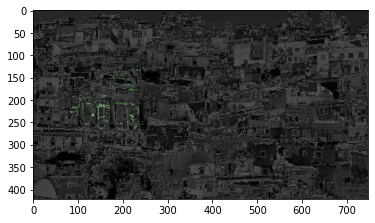

In [48]:
im4 = cv2.imread("im1_4.jpg")
im4 = cv2.cvtColor(im4, cv2.COLOR_BGR2RGB)
im4_pop = color_pop(im4, [0, 255, 0])
plt.imshow(im4_pop)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in ubyte_scalars
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


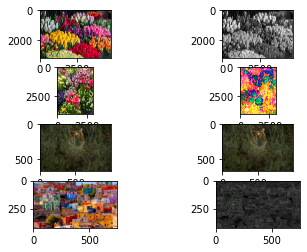

In [49]:
im1 = cv2.imread("im1_1.jpg")
im2 = cv2.imread("im1_2.jpg")
im3 = cv2.imread("im1_3.jpg")
im4 = cv2.imread("im1_4.jpg")

im1_gray = bgr2gray(im1)
im2_hsv = bgr2hsv(im2)
im3_filtered = filter_color(im3, [0, 165, 255])
im4_pop = color_pop(im4, [0, 255, 0])

im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)
im4 = cv2.cvtColor(im4, cv2.COLOR_BGR2RGB)

plt.subplot(4, 2, 1)
plt.imshow(im1)
plt.subplot(4, 2, 2)
plt.imshow(im1_gray, cmap='gray')
plt.subplot(4, 2, 3)
plt.imshow(im2)
plt.subplot(4, 2, 4)
plt.imshow(im2_hsv, cmap='hsv')
plt.subplot(4, 2, 5)
plt.imshow(im3)
plt.subplot(4, 2, 6)
plt.imshow(im3_filtered)
plt.subplot(4, 2, 7)
plt.imshow(im4)
plt.subplot(4, 2, 8)
plt.imshow(im4_pop)
plt.show()

